# Nonlinear Forced Oscillator
Import useful modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Redefine the RK4 integrator, to also use the time. While this is the most general form of the ODE integrator, in the previous assignments we did not have to worry about forces that are explicit functions of time. In this assignment, instead, we will include a driving force that depends on time.

In [ ]:
def RK4(diffeq,dof,t,dt):
    """
    Runge-Kutta second order method for ODEs:
    Given the degrees of freedom at time t
    Returns the degrees of freedom at time t+dt
    NOTE: the diffeq function passed in input needs to return
    the derivative wrt time of each degree of freedom of the system
    """
    k1=dt*diffeq(dof,t)
    k2=dt*diffeq(dof+0.5*k1,t+0.5*dt)
    k3=dt*diffeq(dof+0.5*k2,t+0.5*dt)
    k4=dt*diffeq(dof+k3,t+dt)
    return dof+(k1+k4)/6.0+(k2+k3)/3.

Define the basic global (e.g. they will be used without passing them explicitly) parameters of the simulation

In [ ]:
b=0.5 # coefficient of linear drag
omegad=0.6 # angular frequency of driving force

Assignment 2A: complete the definition of the differential equation for the time evolution of a rigid pendulum, subject to linear drag and a time-dependent oscillatory driving force.

In [ ]:
def pendulum(dof,t):
    ddofdt=np.zeros(len(dof))
    ddofdt[0]=
    ddofdt[1]=
    return ddofdt

We can use the above differential equation to simulate the angle and angular velocity of the forced pendulum as a function of time. In the following we will specify the time in terms of the periods of the forced oscillations $T_d=2\pi/\omega_d$. In order for the algorithm to be accurate, we need to use a timestep that is a small fraction of the period (can you think why?). 

In [ ]:
fd=0.7
dof0=np.array([0.6, 0.0]) # initial angular displacement and angular velocity of the pendulum
period = 3*np.pi/omegad # period of the driving force
steps_per_period=60 # number of steps per period
nperiods = 10 # number of periods simulated
steps=steps_per_period*nperiods # total number of steps simulated
dt = period/steps_per_period # timestep
#
dof=dof0.copy()
t=0.
theta=[dof[0]] # container to store the angular displacement along the simulation
omega=[dof[1]] # container to store the angular velocity along the simulation
time=[t] # container to store the time
for i in range(steps): # this steps will not be saved
    dof = RK4(pendulum,dof,t,dt)
    t = t+dt
    theta.append(dof[0])
    omega.append(dof[1])
    time.append(t)

We can visualize the results

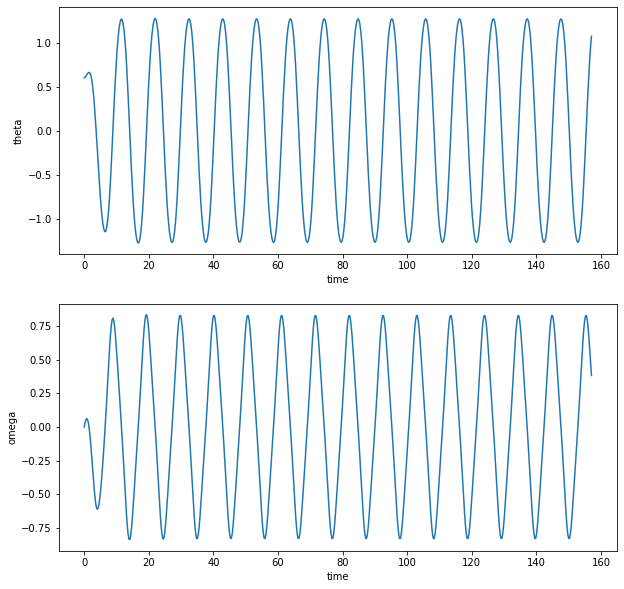

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(time,theta)
plt.ylabel('theta')
plt.xlabel('time')
plt.subplot(2,1,2)
plt.plot(time,omega)
plt.ylabel('omega')
plt.xlabel('time')
plt.show()

However, if we start with a different driving force, the dynamics can become chaotic (try!). In this cases, it will become evident that the angle can become very large (both in the positive or negative directions). However, the anglular displacement is a periodic quantity and can always be mapped into the $[-\pi,\pi]$ interval. We will use this in the following. 

In [ ]:
def remap(theta):
    if abs(theta)>np.pi : theta=( theta-2*np.pi if theta>0 else theta+2*np.pi)
    return theta

As for the logistic map, the initial part of the simulation is not representative of the stable attractors of the systems and we would better not save those steps if we want to analyze the sable solutions. After the transient steps have been performed, we will save the trajectory of the pendulum. 

In [ ]:
fd=0.7
dof0=np.array([0.6, 0.0]) # initial angular displacement and angular velocity of the pendulum
period = 3*np.pi/omegad # period of the driving force
steps_per_period=60 # number of steps per period
dt = period/steps_per_period # timestep
#
dof=dof0.copy()
t=0.
#
transient_periods=50 # number of initial periods that will be discarded (transient)
transient_steps=steps_per_period*transient_periods # total number of transient steps
for i in range(transient_steps): # this steps will not be saved
    dof = RK4(pendulum,dof,t,dt)
    t = t+dt
#
production_periods=10 # number of periods that we will save
production_steps=steps_per_period*production_periods # total number of steps to save
theta=[dof[0]] # container to store the angular displacement along the simulation
omega=[dof[1]] # container to store the angular velocity along the simulation
time=[t] # container to store the time
for i in range(production_steps):
    dof = RK4(pendulum,dof,t,dt)
    t = t+dt
    theta.append(dof[0])
    omega.append(dof[1])
    time.append(t)

Assignment 2B: following the structure above, simulate the driven oscillator for two value of the magnitude of the driven force (Fd=0.7 and 1.1). Start from slightly different initial conditions and plot the difference in angular velocity as a function of time.

Assignment 2C: for the choatic motion at $F_d=1.1$, generate a Poincare' map, by sampling at regular time intervals. This means that, instead of saving theta, omega, and time at each timestep, you only save them when the timestep is a at the beginning or at half of the period. 

HINT: you can test if the timestep is at the beginning of the period or at the half period by looking at the reminder of the timestep count over the number of steps per half period. That is, if you are at step i and the half period has 20 steps, if you compute the reminder of i/20 you will get 0 if i is a multiple of 20, i.e. if we are at half or full periods. 

In [ ]:
i=394
i%steps_per_period # the % operator is the reminder of the division of two integers

34

In [ ]:
i=600
i%steps_per_period # the % operator is the reminder of the division of two integers

0